了解sklearn中自带的模型可解释性工具。

# PD与ICE

## PD

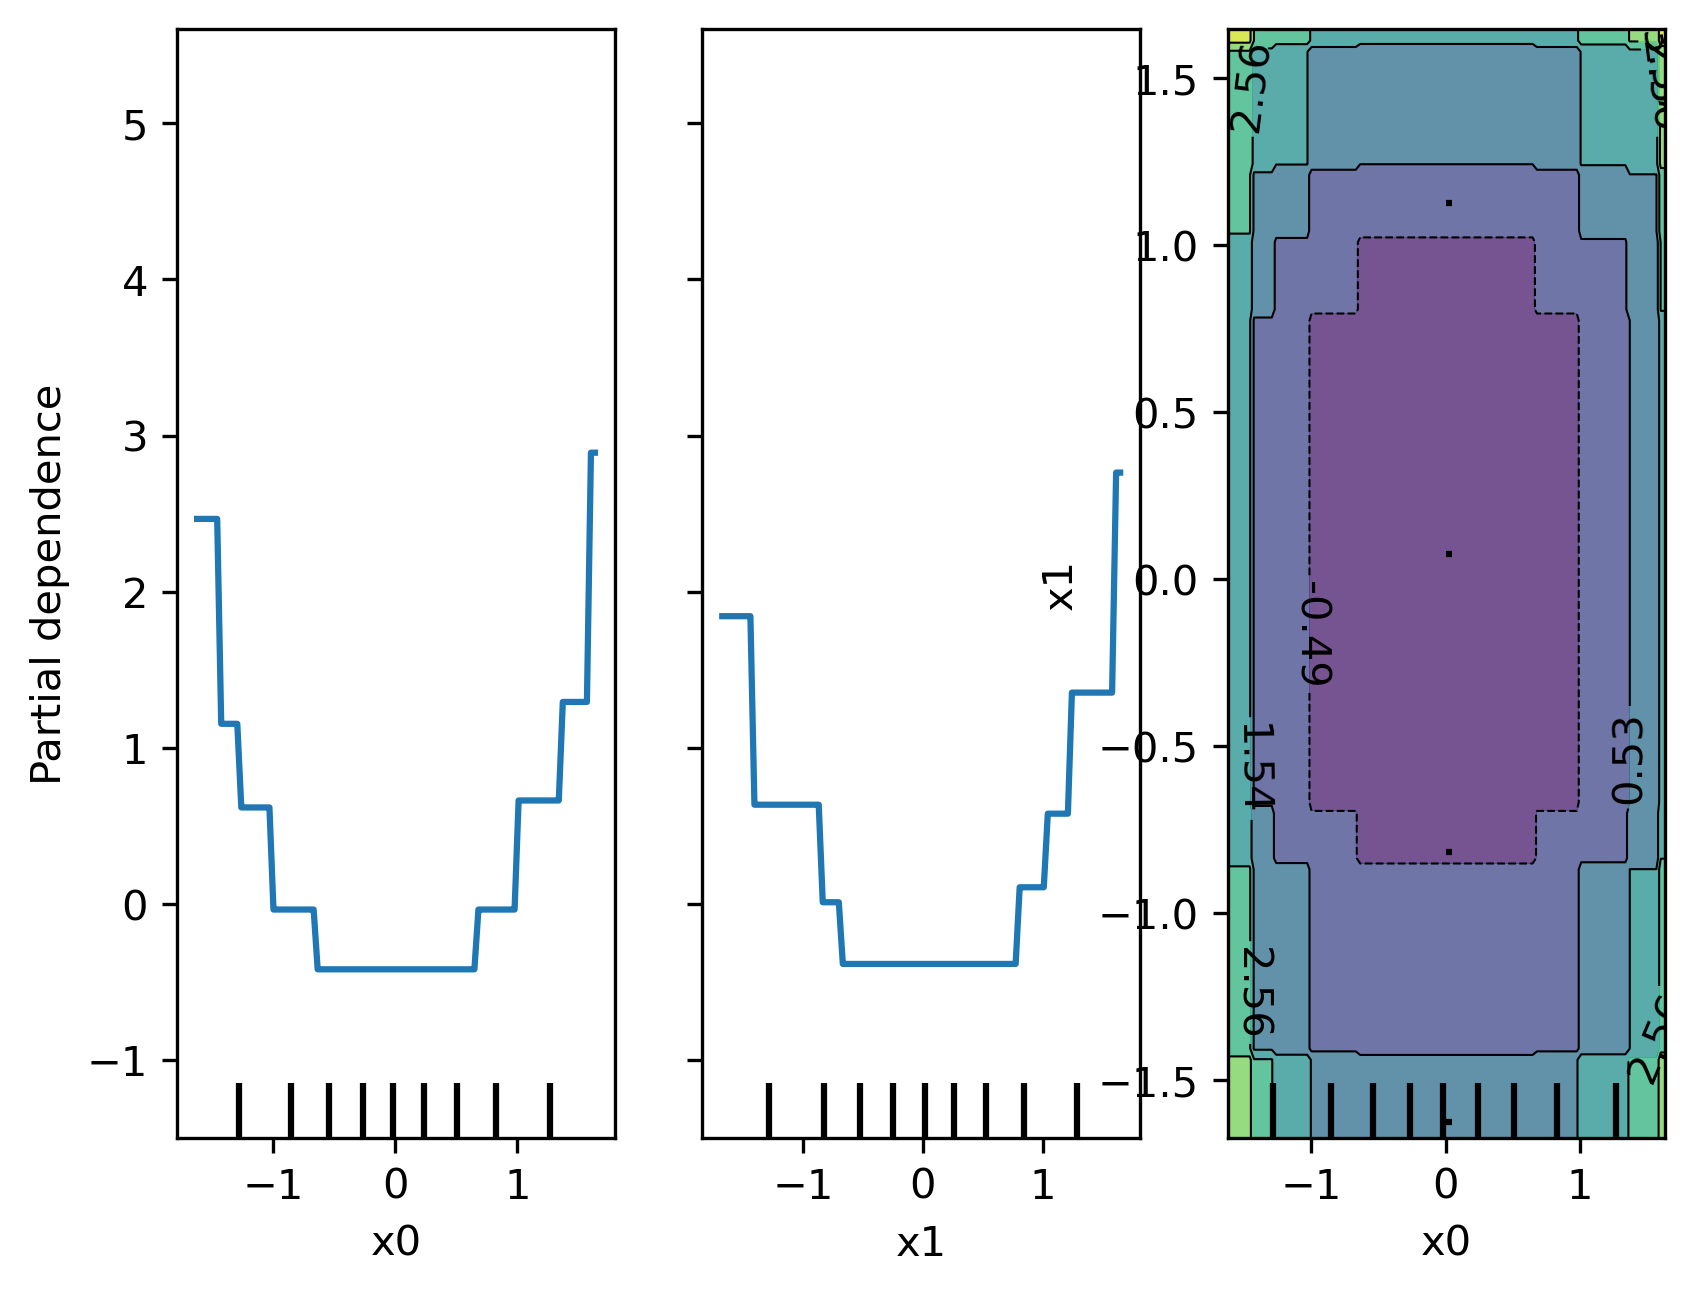

In [4]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from matplotlib import pyplot as plt

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
features = [0, 1, (0, 1)]
# 设置dpi为300
plt.rcParams['figure.dpi'] = 300
PartialDependenceDisplay.from_estimator(clf, X, features)

In [5]:
from sklearn.inspection import partial_dependence

results = partial_dependence(clf, X, [0])
results["average"]
results["grid_values"]

[array([-1.62497055, -1.59201391, -1.55905727, -1.52610063, -1.493144  ,
        -1.46018736, -1.42723072, -1.39427408, -1.36131745, -1.32836081,
        -1.29540417, -1.26244753, -1.22949089, -1.19653426, -1.16357762,
        -1.13062098, -1.09766434, -1.06470771, -1.03175107, -0.99879443,
        -0.96583779, -0.93288115, -0.89992452, -0.86696788, -0.83401124,
        -0.8010546 , -0.76809797, -0.73514133, -0.70218469, -0.66922805,
        -0.63627141, -0.60331478, -0.57035814, -0.5374015 , -0.50444486,
        -0.47148823, -0.43853159, -0.40557495, -0.37261831, -0.33966167,
        -0.30670504, -0.2737484 , -0.24079176, -0.20783512, -0.17487849,
        -0.14192185, -0.10896521, -0.07600857, -0.04305193, -0.0100953 ,
         0.02286134,  0.05581798,  0.08877462,  0.12173126,  0.15468789,
         0.18764453,  0.22060117,  0.25355781,  0.28651444,  0.31947108,
         0.35242772,  0.38538436,  0.418341  ,  0.45129763,  0.48425427,
         0.51721091,  0.55016755,  0.58312418,  0.6

## ICE

In [6]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

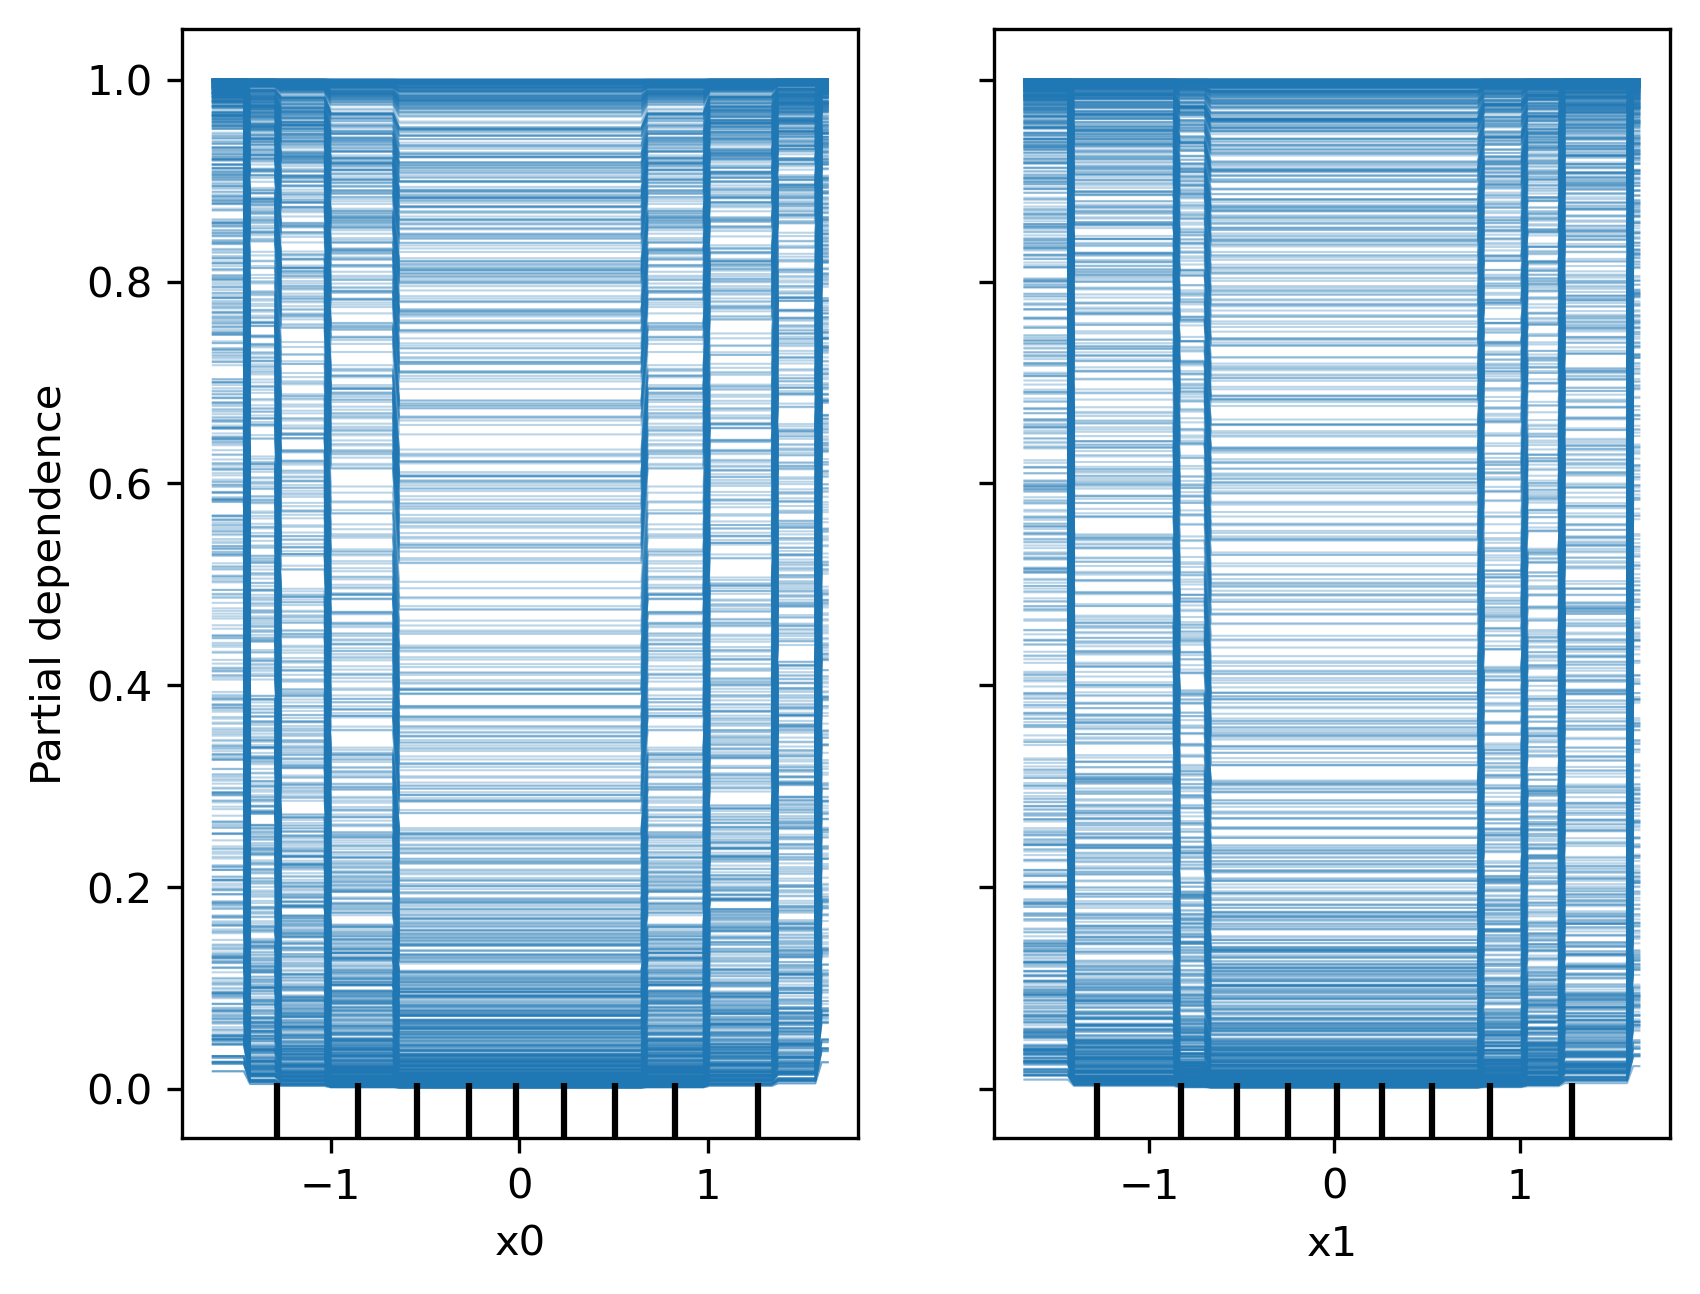

In [7]:
X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
features = [0, 1]
PartialDependenceDisplay.from_estimator(clf, X, features,
    kind='individual')

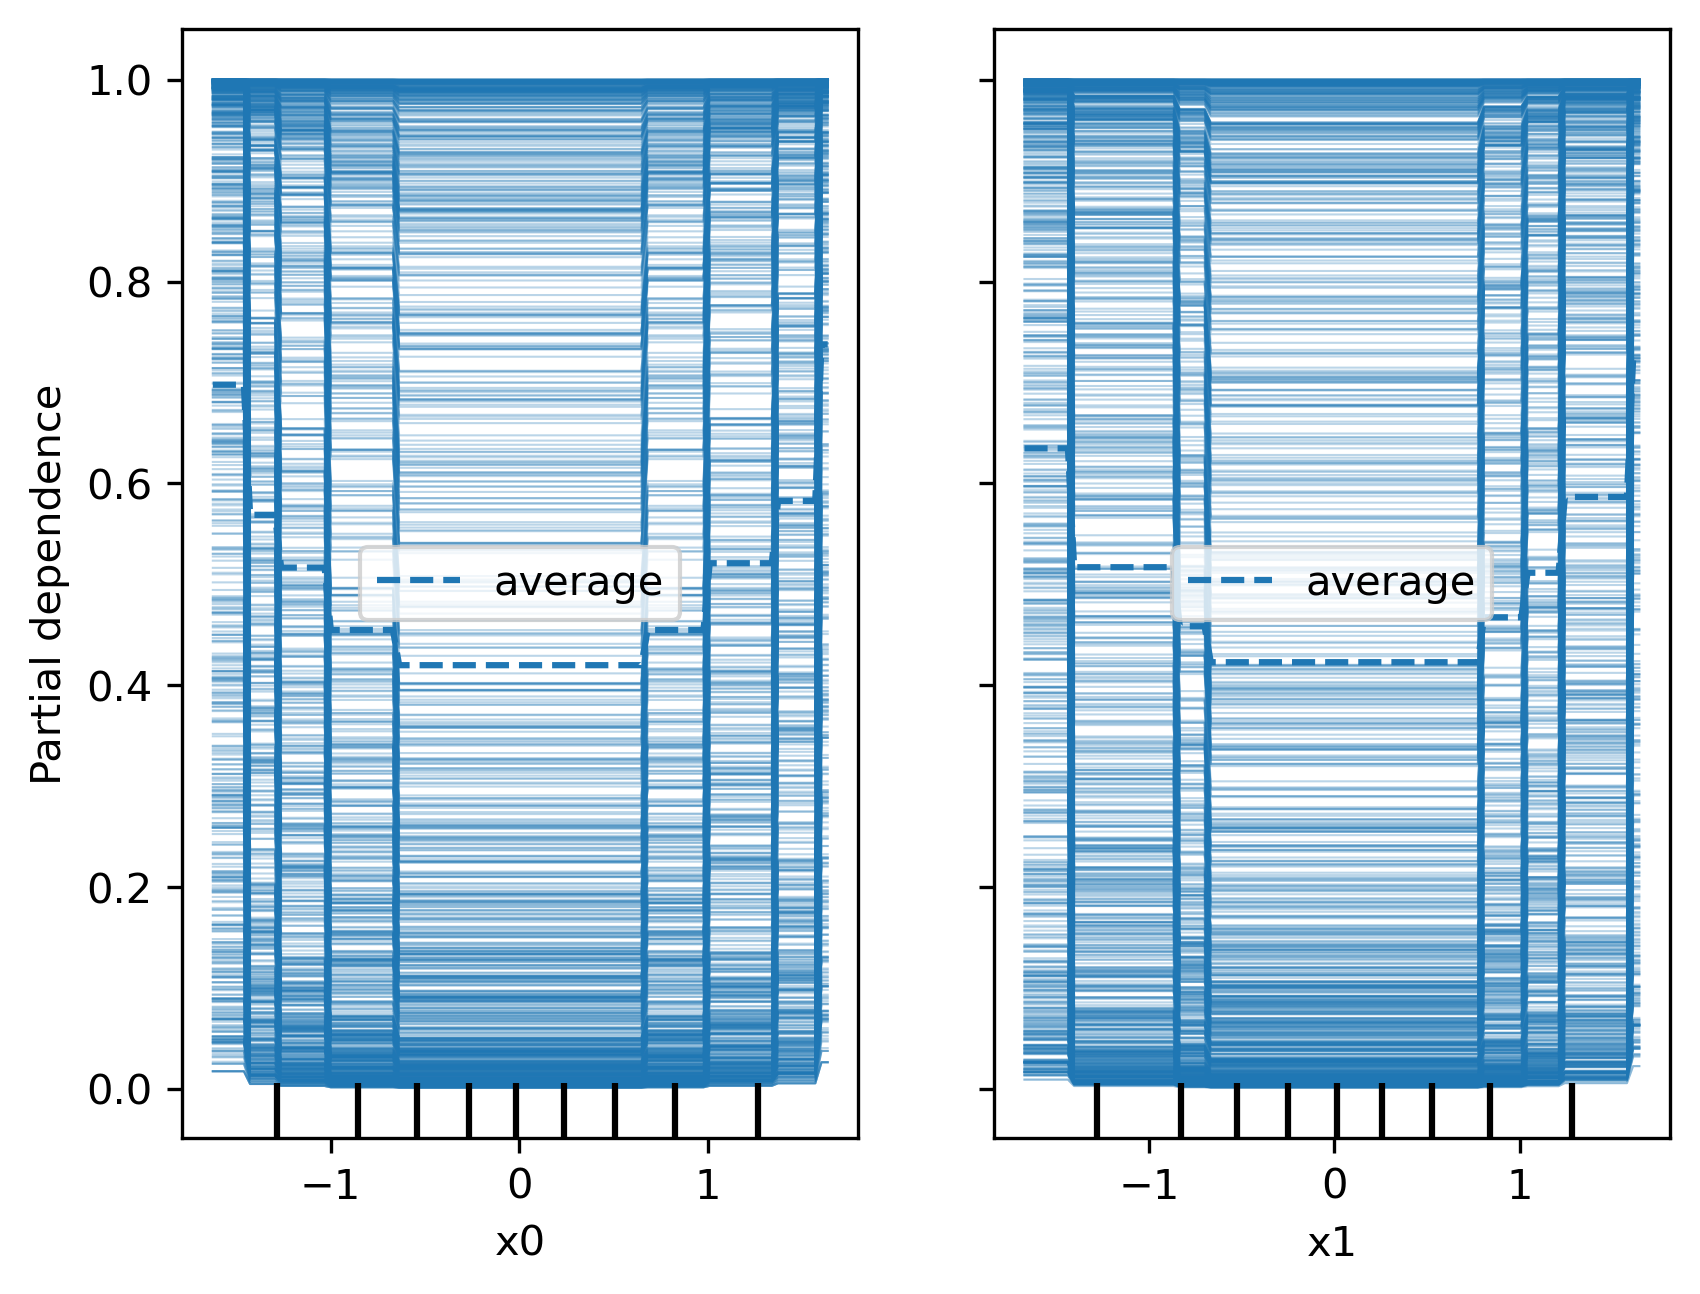

In [8]:
PartialDependenceDisplay.from_estimator(clf, X, features,
    kind='both')

# 置换重要性

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(
    diabetes.data, diabetes.target, random_state=0)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.3566675322939421

In [10]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023


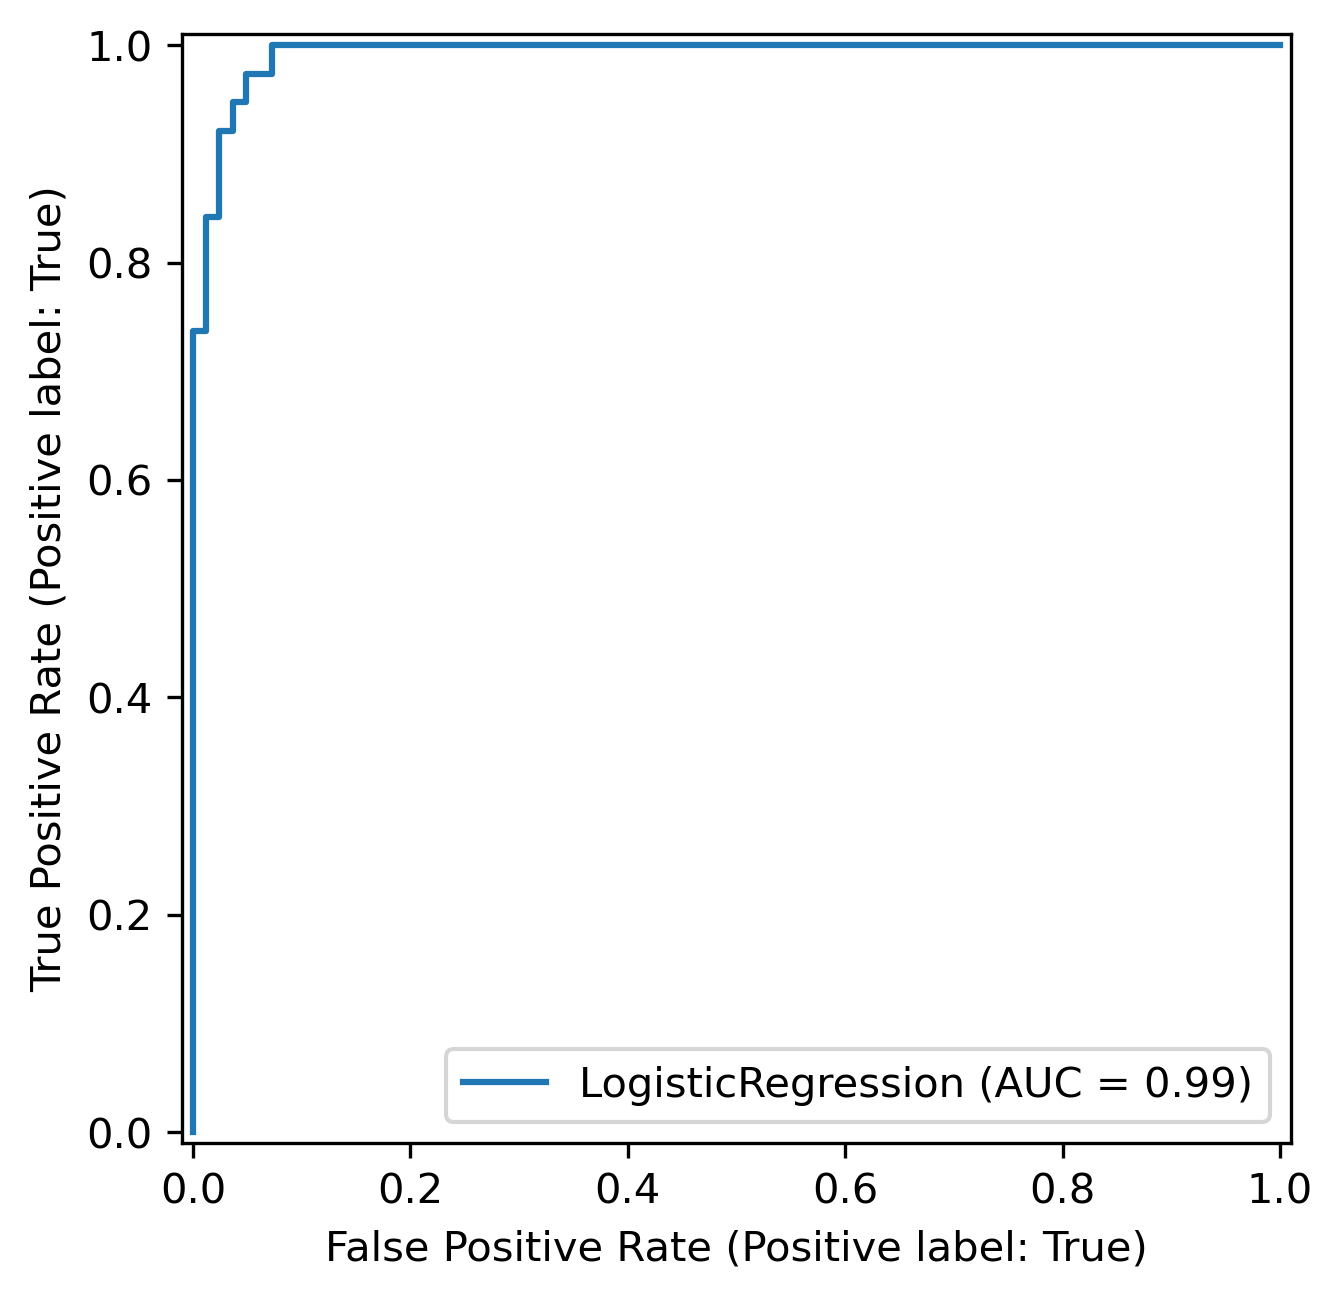

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
y = y == 2  # make binary
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=.8, random_state=42
)
clf = LogisticRegression(random_state=42, C=.01)
clf.fit(X_train, y_train)

clf_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

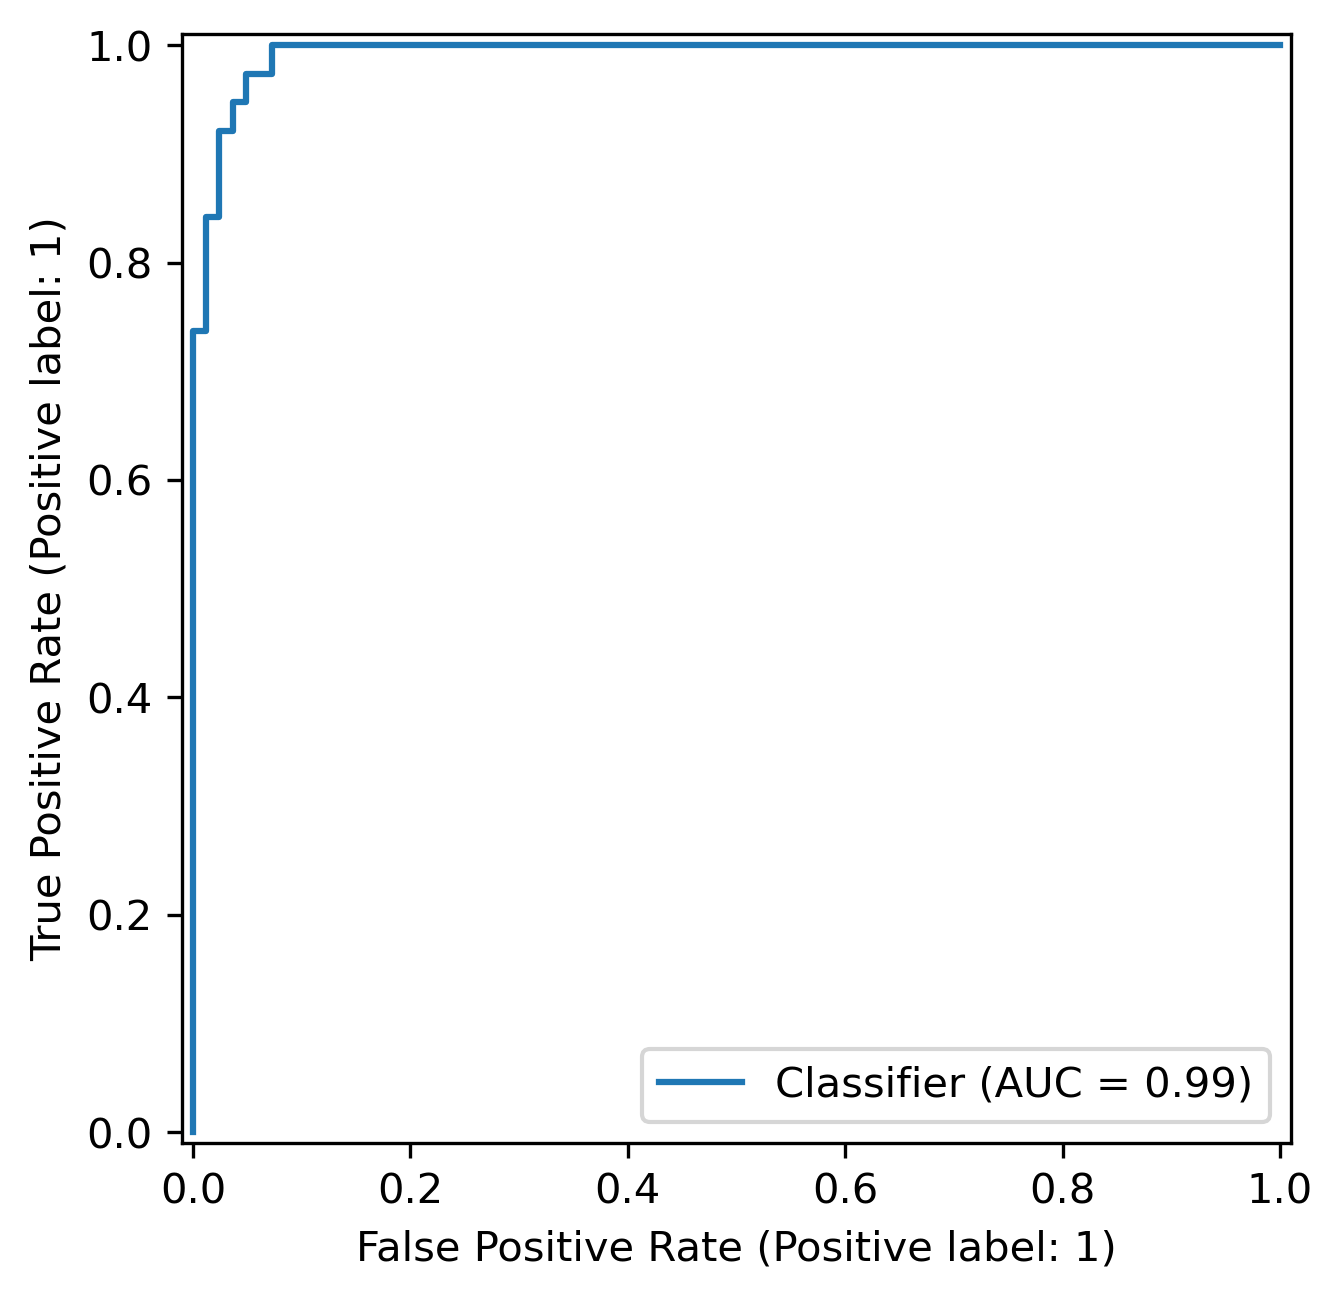

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
y = y == 2  # make binary
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=.8, random_state=42
)
clf = LogisticRegression(random_state=42, C=.01)
clf.fit(X_train, y_train)

# select the probability of the class that we considered to be the positive label
y_pred = clf.predict_proba(X_test)[:, 1]

clf_disp = RocCurveDisplay.from_predictions(y_test, y_pred)

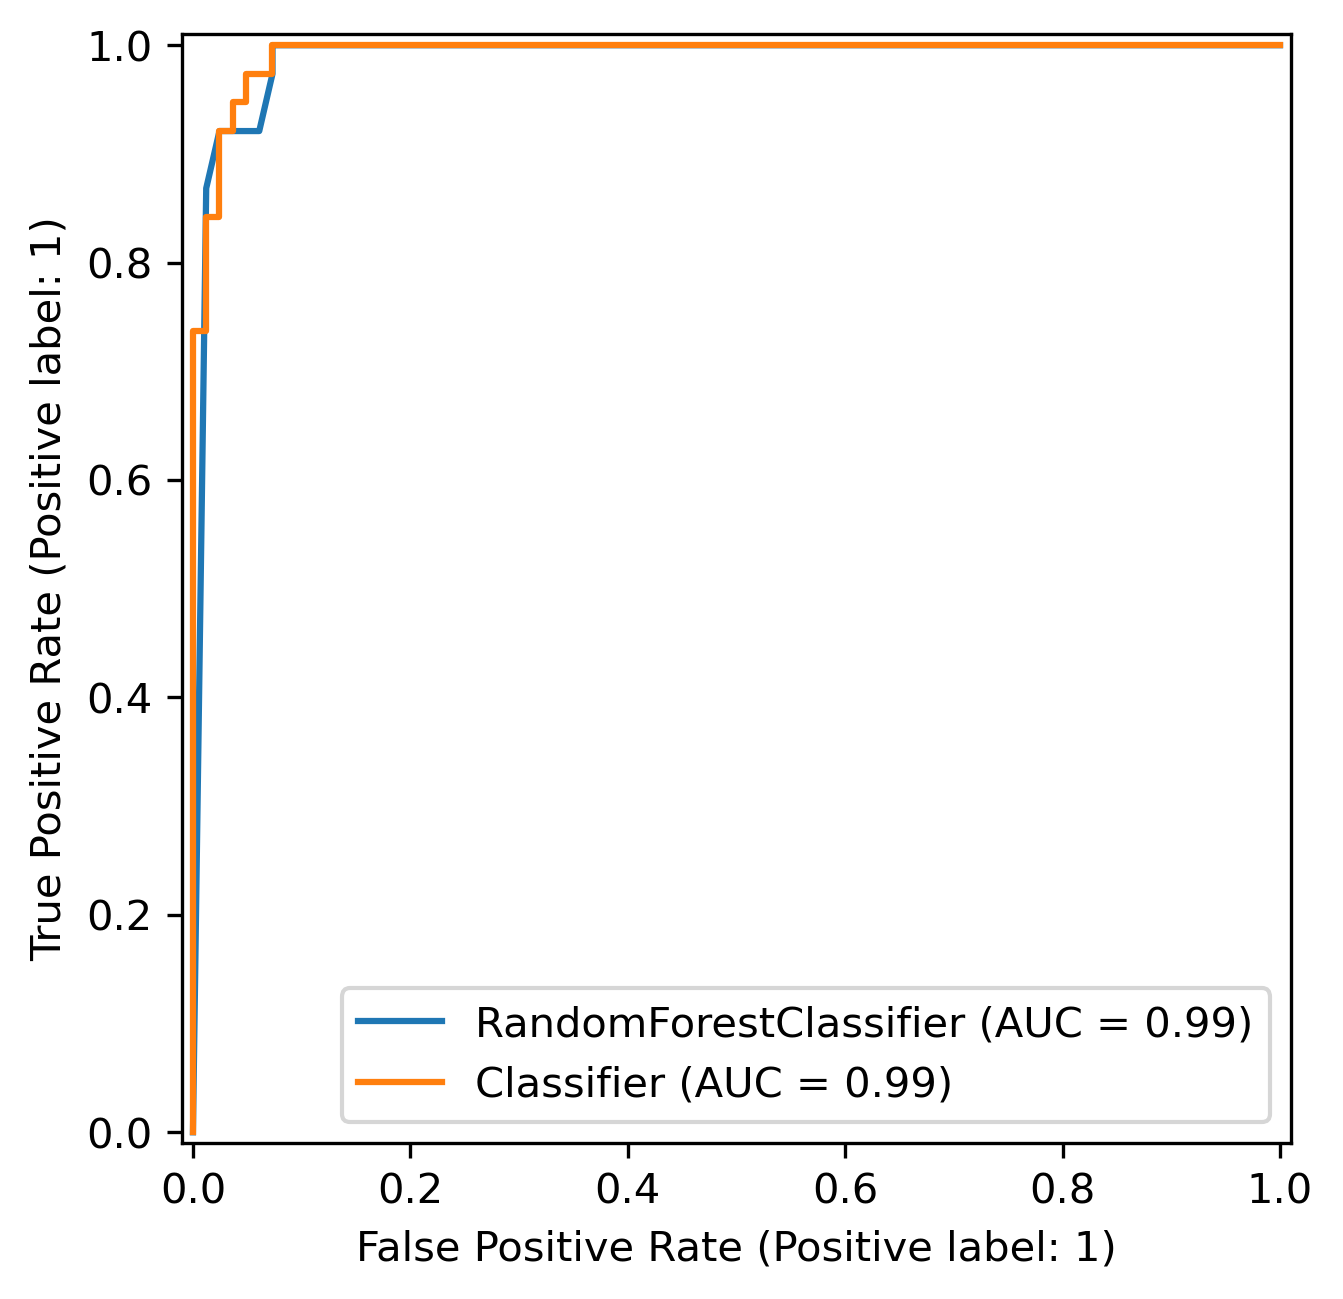

In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(
  rfc, X_test, y_test, ax=ax
)
clf_disp.plot(ax=ax)